In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Merging all the datasets for analysis
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [ ]:
# Checking for null values
print("\nMissing Values:")
print(data.isnull().sum())

# Checking for duplicates
print("\nDuplicate Rows:")
print(data.duplicated().sum())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# printing the Data Types
print("\nData Types:")
print(data.dtypes)


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Duplicate Rows:
0

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000

Data Types:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
Total

# **Visualizations**

<ipython-input-6-a683d2f499e3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


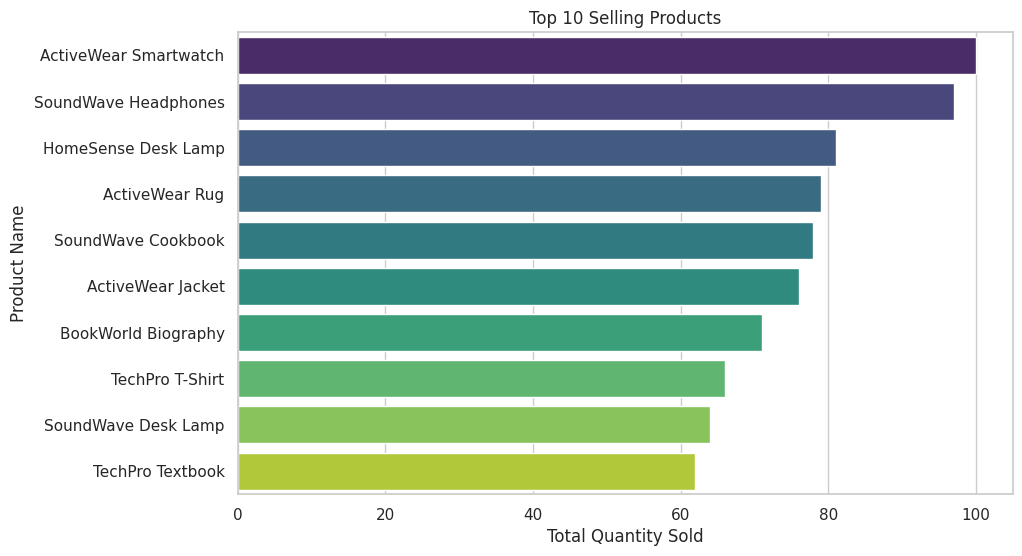

In [ ]:
# 1. Top-selling products
top_products = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure()
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

<ipython-input-7-9f6ece1cf499>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="magma")


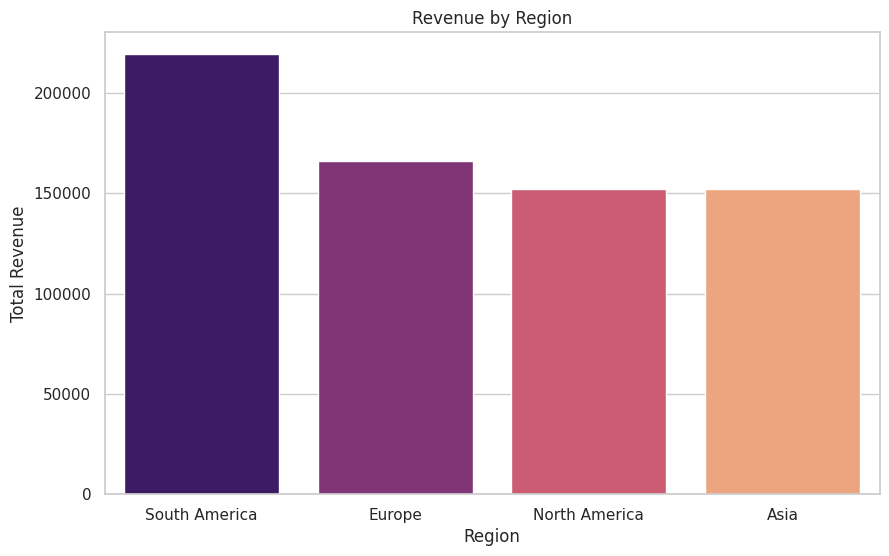

In [ ]:
# 2. Revenue by region
region_revenue = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="magma")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

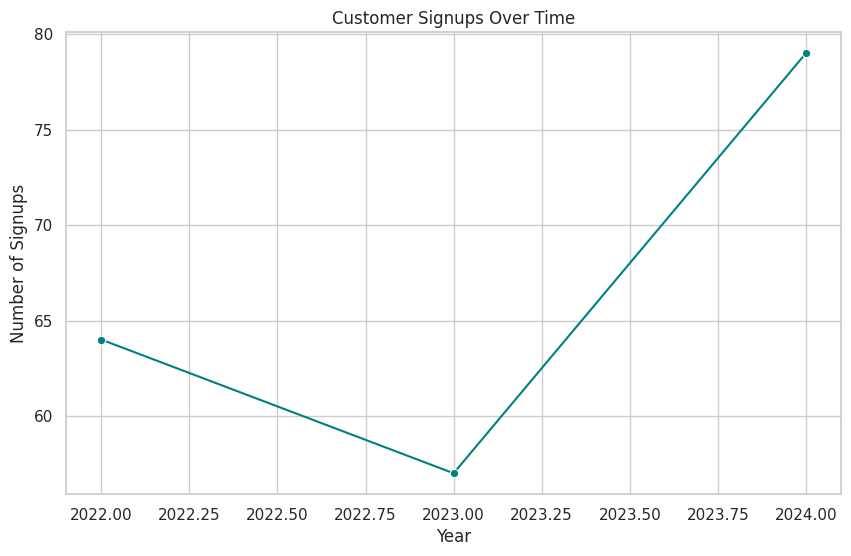

In [ ]:
# 3. Signup trends over time
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
signup_trend = customers.groupby(customers["SignupDate"].dt.year).size()
plt.figure()
sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker="o", color="teal")
plt.title("Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

<ipython-input-12-4a65f5f36d4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_value_customers.values, y=high_value_customers.index, palette="coolwarm")


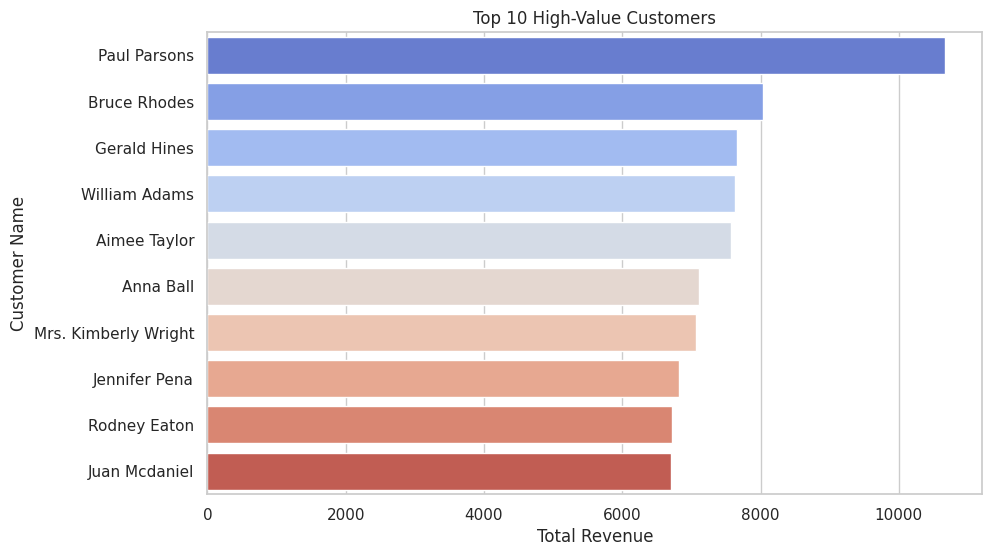

In [ ]:
# 4. High-value customers
high_value_customers = data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure()
sns.barplot(x=high_value_customers.values, y=high_value_customers.index, palette="coolwarm")
plt.title("Top 10 High-Value Customers")
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.show()